# Convolutional Neural Network (CNN) program for classifying handwritten digits from the MNIST dataset.

## Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Explanation: These lines import the required libraries and modules. TensorFlow is the deep learning framework used, and Keras is a high-level neural networks API running on top of TensorFlow. The MNIST dataset is used for training and testing, and matplotlib.pyplot is used for visualization.


# Load and preprocess the MNIST dataset



In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Explanation: This line loads the MNIST dataset and splits it into training and testing sets, where each set comprises images and their respective labels. The term 'corresponding labels' denotes the target values or categories assigned to each input data point in the dataset. For example, every image of a handwritten digit is associated with a label indicating the actual digit it represents (0 to 9). These labels serve as the ground truth values that the model aims to predict during training.

## Normalize pixel values to be between 0 and 1

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Explanation:This line normalizes the pixel values of the images to a range between 0 and 1, which helps the neural network converge faster during training.

## Define the CNN model


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


Explanation: These lines define the architecture of the CNN model using the Keras Sequential API(Application Programming Interface) . It consists of convolutional layers with max-pooling, followed by fully connected layers. The activation functions used are ReLU for convolutional layers and softmax for the output layer (of a neural network for multi-class classification problems).

## Compile the model


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Explanation: This line compiles the model, specifying the optimizer, loss function, and metrics to be used during training.

## Reshape data for CNN input


In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

Explanation: These lines reshape the input data to match the expected input shape of the CNN model.

## Train the model


In [7]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1470 - accuracy: 0.9543 - val_loss: 0.0390 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0472 - val_accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0261 - val_accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0291 - val_accuracy: 0.9913


Explanation: This line trains the model on the training data for 5 epochs, using the validation data for evaluation during training.

## Evaluate the model


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0291 - accuracy: 0.9913
Test accuracy: 0.9912999868392944


Explanation: This line evaluates the trained model on the test data and prints the test accuracy.

## Example prediction


In [9]:
example_image = test_images[0]
example_image = example_image.reshape((1, 28, 28, 1))
prediction = model.predict(example_image)
predicted_label = tf.argmax(prediction[0]).numpy()

1/1 [==============================] - 0s 114ms/step


Explanation: These lines demonstrate an example prediction using the trained model on a single test image. The image is reshaped to match the input shape of the model, and the predicted label is printed.

In [10]:
print(f"Predicted label: {predicted_label}")

Predicted label: 7


## Visualize the example image


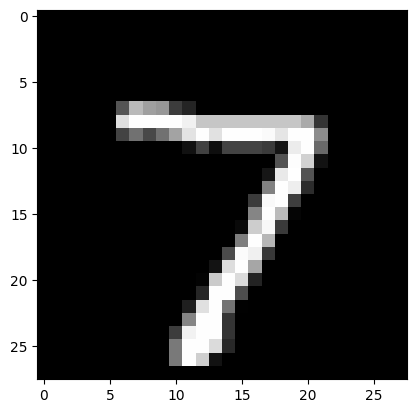

In [11]:
plt.imshow(test_images[0].reshape((28, 28)), cmap='gray')
plt.show()

Explaination: The line of code "plt.imshow(test_images[0].reshape((28, 28)), cmap='gray')":
 'test_images[0]' visualizes the first image from the MNIST test dataset. 'reshape((28, 28))' reshaping it to a 28x28 2D (2 dimension ) array and displaying it in grayscale using matplotlib.